In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import os
os.getcwd()

df = pd.read_csv("churn_clean.csv")
df.dropna()
print(df.shape)
print(list(df.columns))
df.head()

(10000, 50)
['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.rename(columns={'Item1':'Timely response','Item2':'Timely fixes','Item3':'Timely replacements','Item4':'Reliability','Item5':'Options','Item6':'Respectful response','Item7':'Courteous exchange','Item8':'Evidence of active listening'},inplace=True)

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CaseOrder                     10000 non-null  int64  
 1   Customer_id                   10000 non-null  object 
 2   Interaction                   10000 non-null  object 
 3   UID                           10000 non-null  object 
 4   City                          10000 non-null  object 
 5   State                         10000 non-null  object 
 6   County                        10000 non-null  object 
 7   Zip                           10000 non-null  int64  
 8   Lat                           10000 non-null  float64
 9   Lng                           10000 non-null  float64
 10  Population                    10000 non-null  int64  
 11  Area                          10000 non-null  object 
 12  TimeZone                      10000 non-null  object 
 13  Jo

In [5]:
# summary statistics of character column
 
df.describe(include=['object'])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6058,52,1620,3,25,639,5,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,G59211,ea7a8a15-d70d-429c-a220-23e0aec370c3,f7456561afc02017844e57c1429b4ae6,Houston,TX,Washington,Suburban,America/New_York,Occupational psychologist,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,1,1,1,34,603,111,3346,4072,30,2092,5025,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398


In [6]:
# summary statistics of character column

df.describe(include='all')

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
count,10000.00000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000.0000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,10000,10000,10000,6058,52,1620,NaN,NaN,NaN,NaN,3,25,639,NaN,NaN,NaN,5,3,2,NaN,NaN,NaN,NaN,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,G59211,ea7a8a15-d70d-429c-a220-23e0aec370c3,f7456561afc02017844e57c1429b4ae6,Houston,TX,Washington,NaN,NaN,NaN,NaN,Suburban,America/New_York,Occupational psychologist,NaN,NaN,NaN,Divorced,Female,No,NaN,NaN,NaN,NaN,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,34,603,111,NaN,NaN,NaN,NaN,3346,4072,30,NaN,NaN,NaN,2092,5025,7350,NaN,NaN,NaN,NaN,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,NaN,NaN,NaN,NaN,49153.319600,38.757567,-90.782536,9756.562400,NaN,NaN,NaN,2.0877,53.078400,39806.926771,NaN,NaN,NaN,10.001848,12.016000,0.994200,0.398000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,NaN,NaN,NaN,NaN,NaN,NaN,27532.196108,5.437389,15.156142,14432.698671,NaN,NaN,NaN,2.1472,20.698882,28199.916702,NaN,NaN,NaN,2.976019,3.025898,0.988466,0.635953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,601.000000,17.966120,-171.688150,0.000000,NaN,NaN,NaN,0.0000,18.000000,348.670000,NaN,NaN,NaN,0.099747,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,NaN,NaN,NaN,NaN,NaN,NaN,26292.500000,35.341828,-97.082812,738.000000,NaN,NaN,NaN,0.0000,35.000000,19224.717500,NaN,NaN,NaN,8.018214,10.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,NaN,NaN,NaN,NaN,NaN,NaN,48869.500000,39.395800,-87.918800,2910.500000,NaN,NaN,NaN,1.0000,53.000000,33170.605000,NaN,NaN,NaN,10.018560,12.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,NaN,NaN,NaN,NaN,NaN,NaN,71866.500000,42.106908,-80.088745,13168.000000,NaN,NaN,NaN,3.0000,71.000000,53246.170000,NaN,NaN,NaN,11.969485,14.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [7]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
df.dtypes

CaseOrder                         int64
Customer_id                      object
Interaction                      object
UID                              object
City                             object
State                            object
County                           object
Zip                               int64
Lat                             float64
Lng                             float64
Population                        int64
Area                             object
TimeZone                         object
Job                              object
Children                          int64
Age                               int64
Income                          float64
Marital                          object
Gender                           object
Churn                            object
Outage_sec_perweek              float64
Email                             int64
Contacts                          int64
Yearly_equip_failure              int64
Techie                           object


In [9]:
df.shape

(10000, 50)

In [10]:
df.isna().any()

CaseOrder                       False
Customer_id                     False
Interaction                     False
UID                             False
City                            False
State                           False
County                          False
Zip                             False
Lat                             False
Lng                             False
Population                      False
Area                            False
TimeZone                        False
Job                             False
Children                        False
Age                             False
Income                          False
Marital                         False
Gender                          False
Churn                           False
Outage_sec_perweek              False
Email                           False
Contacts                        False
Yearly_equip_failure            False
Techie                          False
Contract                        False
Port_modem  

In [11]:
df.dropna()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71

In [12]:
df.fillna(df.mean(), inplace=True)

In [13]:
df.isna()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

CaseOrder                       0
Customer_id                     0
Interaction                     0
UID                             0
City                            0
State                           0
County                          0
Zip                             0
Lat                             0
Lng                             0
Population                      0
Area                            0
TimeZone                        0
Job                             0
Children                        0
Age                             0
Income                          0
Marital                         0
Gender                          0
Churn                           0
Outage_sec_perweek              0
Email                           0
Contacts                        0
Yearly_equip_failure            0
Techie                          0
Contract                        0
Port_modem                      0
Tablet                          0
InternetService                 0
Phone         

In [15]:
#check for duplicate data in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening


In [16]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [17]:
# check if any rows are duplicated - looking for False
df.duplicated().any()

False

In [18]:
# drop some of the data
df = df.drop(['CaseOrder','Customer_id','InternetService', 'Contract','Interaction','UID','City',
              'State','County','PaymentMethod','Zip','Lat','Lng','Population','Area','TimeZone','Job'], axis=1)

In [19]:
# verify columns were dropped
df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [20]:
#change yes/no to 1/0
df = df.replace(to_replace = ['Yes','No'],value = [1,0])
df['Gender'] = df['Gender'].replace(['Male','Female','Nonbinary'],[1,2,3])

In [21]:
#change Marital to "Married/Not Married", then change to integer 1/0
df['Marital'] = df['Marital'].replace(['Married','Divorced','Widowed','Separated','Never Married','Not Married'],[1,2,3,4,5,6])                   

In [22]:
#convert Marital, OnlineSecurity, Contract, Phone, Gender and Churn to integers
df['Phone'] = df['Phone'].replace(['Yes','No'],[1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
df['Churn'] = df['Churn'].replace(['Yes','No'],[1,0])
df['OnlineSecurity'] = df['OnlineSecurity'].replace(['Yes','No'],[1,0])
df['Marital'] = df['Marital'].replace(['Married','Not Married'],[1,0])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Children                      10000 non-null  int64  
 1   Age                           10000 non-null  int64  
 2   Income                        10000 non-null  float64
 3   Marital                       10000 non-null  int64  
 4   Gender                        10000 non-null  int64  
 5   Churn                         10000 non-null  int64  
 6   Outage_sec_perweek            10000 non-null  float64
 7   Email                         10000 non-null  int64  
 8   Contacts                      10000 non-null  int64  
 9   Yearly_equip_failure          10000 non-null  int64  
 10  Techie                        10000 non-null  int64  
 11  Port_modem                    10000 non-null  int64  
 12  Tablet                        10000 non-null  int64  
 13  Ph

In [24]:
df.describe()


,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,3.001200,1.548700,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,1.399141,0.542086,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,1.000000,1.000000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,2.000000,1.000000,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,3.000000,2.000000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,4.000000,2.000000,1.000000,11.969485,14.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,5.000000,3.000000,1.000000,21.207230,23.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [25]:
my_list = df.columns.values.tolist()
print(my_list)

['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening']


In [26]:
#Move target variable to beginning of columns
df=df[['MonthlyCharge', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening']]

In [27]:
#Verify target variable was moved
my_list = df.columns.values.tolist()
print(my_list)

['MonthlyCharge', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening']


In [28]:
#export prepared dataset
df.to_csv('churn_prepared.csv', index = False)

In [29]:
# Columns for numerical data
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['MonthlyCharge', 'Children', 'Age', 'Income', 'Marital', 'Gender',
       'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone',
       'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Tenure', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening'],
      dtype='object')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MonthlyCharge                 10000 non-null  float64
 1   Children                      10000 non-null  int64  
 2   Age                           10000 non-null  int64  
 3   Income                        10000 non-null  float64
 4   Marital                       10000 non-null  int64  
 5   Gender                        10000 non-null  int64  
 6   Churn                         10000 non-null  int64  
 7   Outage_sec_perweek            10000 non-null  float64
 8   Email                         10000 non-null  int64  
 9   Contacts                      10000 non-null  int64  
 10  Yearly_equip_failure          10000 non-null  int64  
 11  Techie                        10000 non-null  int64  
 12  Port_modem                    10000 non-null  int64  
 13  Ta

<Figure size 720x1440 with 0 Axes>

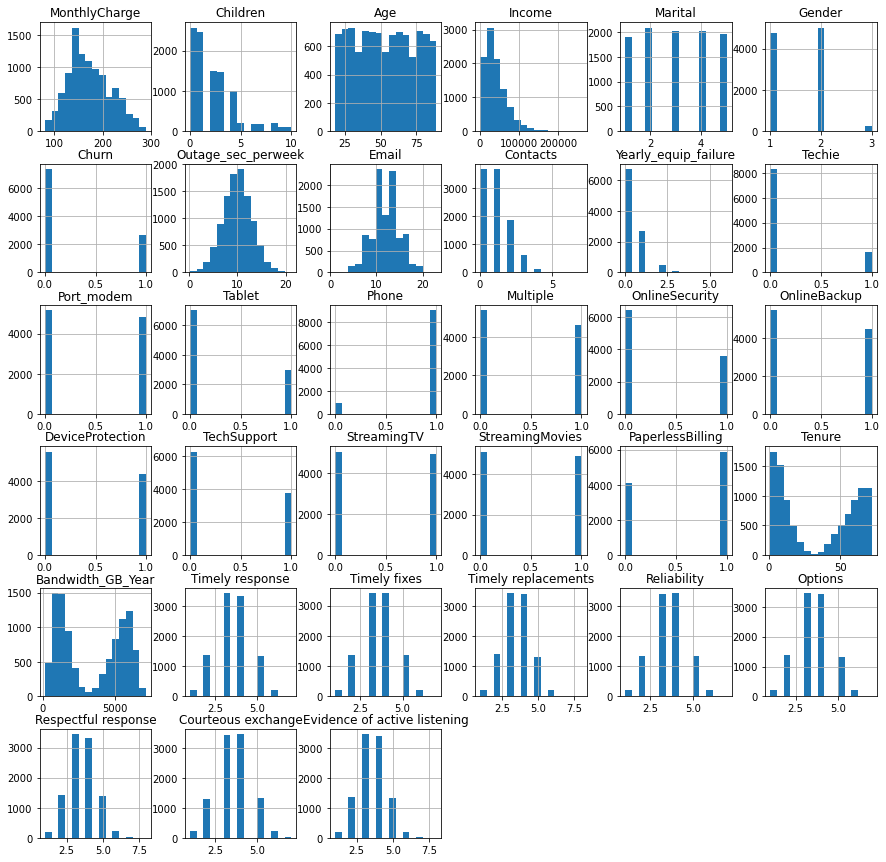

In [31]:
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[NumericalData].hist(bins = 15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

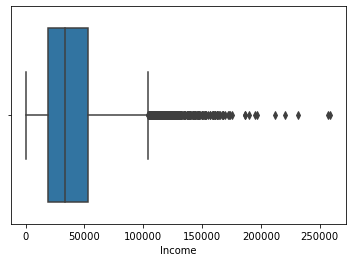

In [32]:
# Create boxplots for continuous variables
boxplot=sns.boxplot(x='Income',data=df)

In [33]:
# Dropping outliers systematically
outlierFilter=df['Income'] < 65000
df = df[outlierFilter]

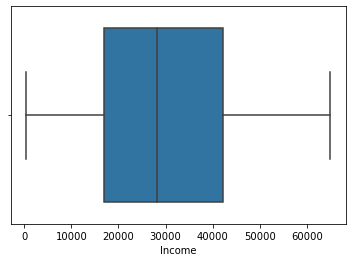

In [34]:
boxplot=sns.boxplot(x='Income',data=df)

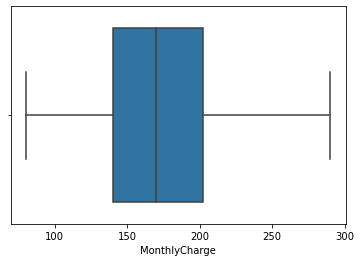

In [36]:
boxplot=sns.boxplot(x='MonthlyCharge',data=df)

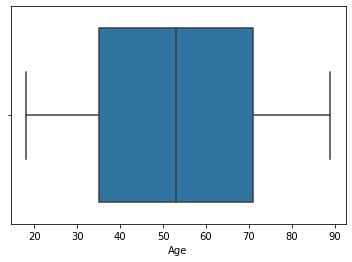

In [37]:
boxplot=sns.boxplot(x='Age',data=df)

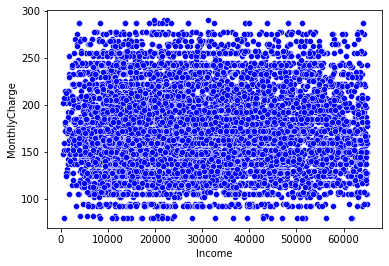

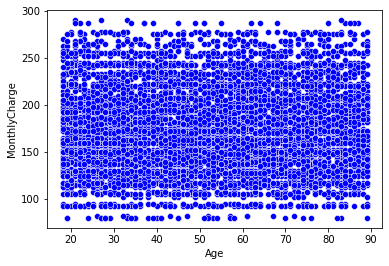

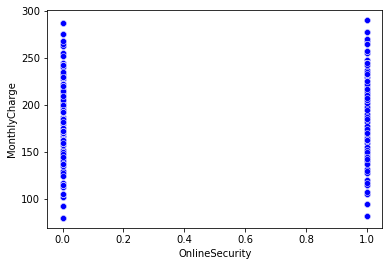

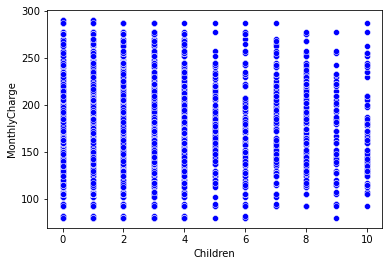

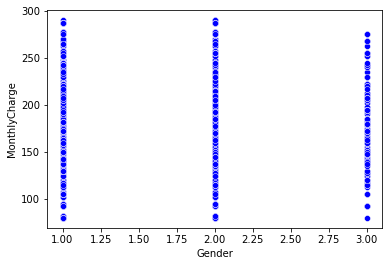

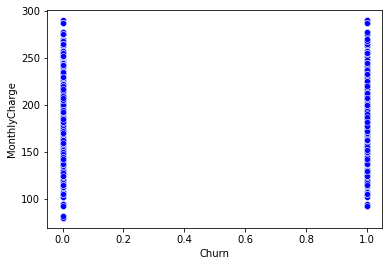

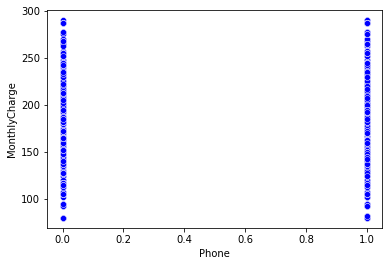

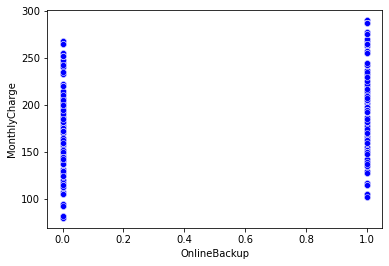

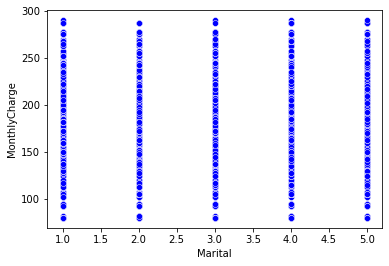

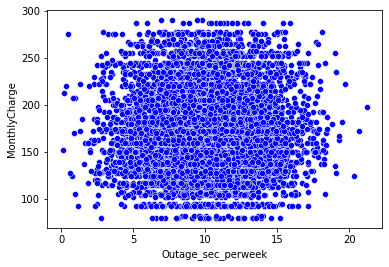

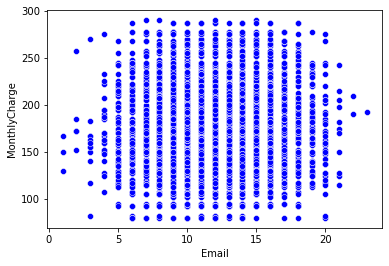

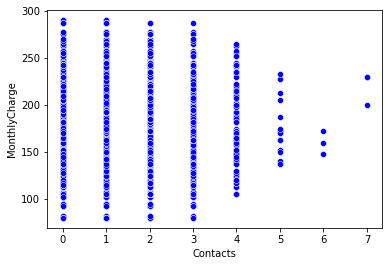

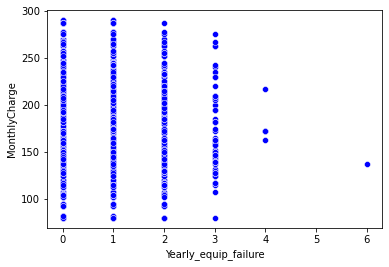

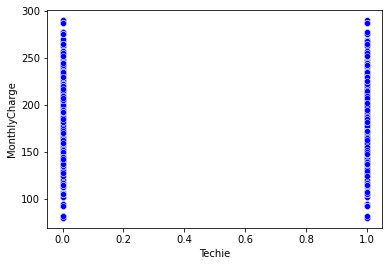

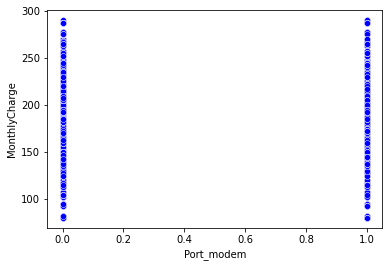

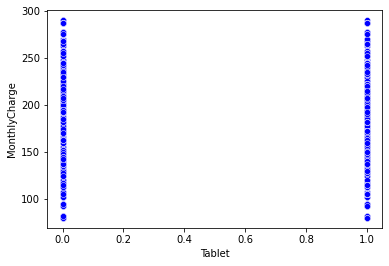

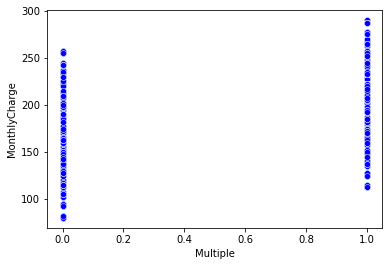

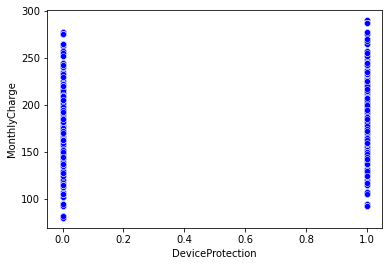

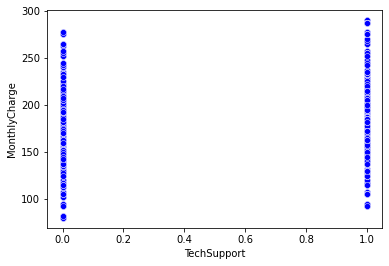

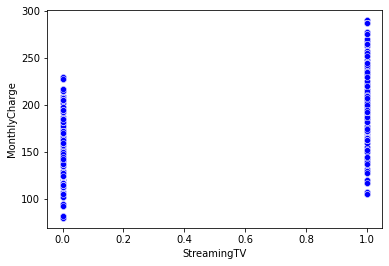

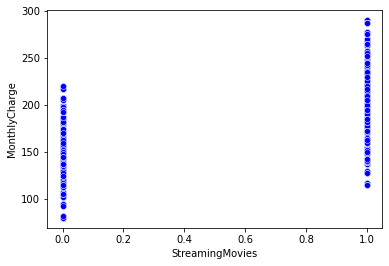

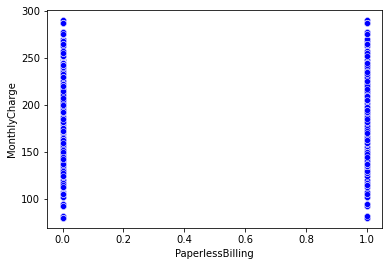

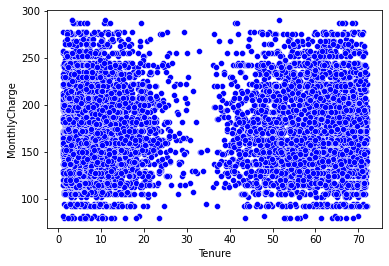

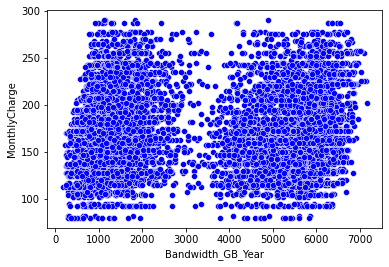

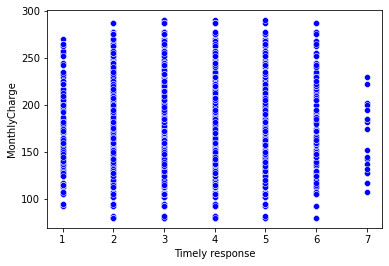

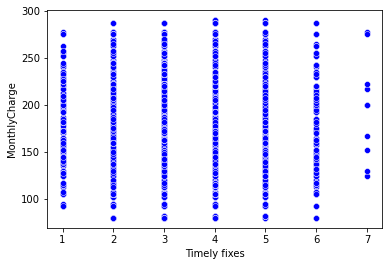

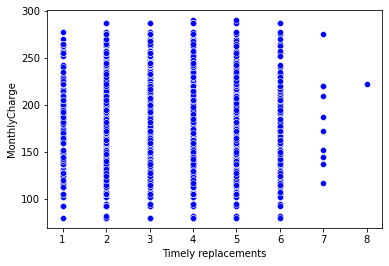

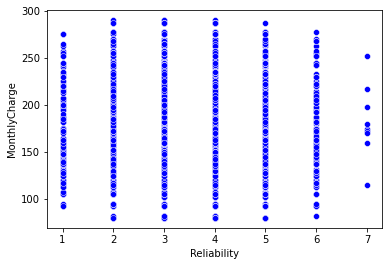

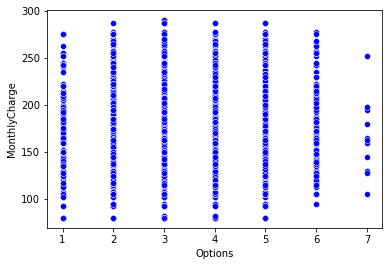

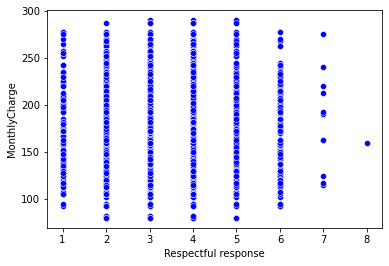

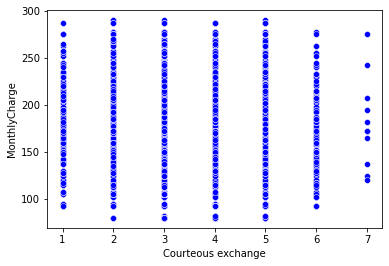

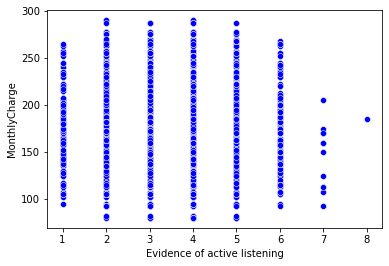

In [38]:
# Create scatterplots to show relationships between target variable and potential predictors

sns.scatterplot(x=df['Income'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Age'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['OnlineSecurity'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Children'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Gender'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Churn'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Phone'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['OnlineBackup'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Marital'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Outage_sec_perweek'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Email'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Contacts'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Yearly_equip_failure'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Techie'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Port_modem'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Tablet'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Multiple'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['DeviceProtection'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['TechSupport'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['StreamingTV'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['StreamingMovies'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['PaperlessBilling'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Tenure'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Bandwidth_GB_Year'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Timely response'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Timely fixes'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Timely replacements'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Reliability'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Options'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Respectful response'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Courteous exchange'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Evidence of active listening'],y=df['MonthlyCharge'],color='blue')
plt.show();

In [49]:

df['intercept'] = 1
lm_MonthlyCharge = sm.OLS(df['MonthlyCharge'],df[['Children', 'Age', 'Income', 'Marital', 'Gender',
    'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
    'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone',
    'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
    'Tenure', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
    'Timely replacements', 'Reliability', 'Options', 'Respectful response',
    'Courteous exchange', 'Evidence of active listening','intercept']]).fit()

In [50]:
print(lm_MonthlyCharge.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1740.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:51:14   Log-Likelihood:                -34761.
No. Observations:                8361   AIC:                         6.959e+04
Df Residuals:                    8328   BIC:                         6.982e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Children        

In [45]:
#heatmap and correlatin matrix dataframe creation
Churn_heatmap = df[['MonthlyCharge', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening']]

,MonthlyCharge,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
MonthlyCharge,1.000000,-0.013683,0.001535,0.011175,0.010614,-0.009228,0.374658,0.022467,0.007462,0.008054,-0.008838,0.005302,-0.000895,0.002933,-0.020756,0.385882,0.055857,0.258460,0.168346,0.119952,0.478070,0.606807,0.000391,0.000205,0.064217,0.008985,0.001163,-0.010981,0.004810,-0.011714,0.008361,-0.008844,0.005631
Children,-0.013683,1.000000,-0.033374,0.023209,-0.007917,-0.001309,0.001830,-0.003723,-0.003386,-0.025816,0.013268,-0.002063,0.013418,0.005536,-0.007001,-0.026062,-0.000121,-0.000056,0.008692,0.007086,-0.006865,0.002562,0.006550,0.000790,0.031826,0.010461,0.017473,-0.003032,-0.016933,0.002702,-0.001779,0.001844,-0.011107
Age,0.001535,-0.033374,1.000000,-0.004237,0.002969,-0.014168,0.004655,-0.008008,-0.001378,0.020011,0.018497,-0.005617,0.000771,-0.003773,0.014948,-0.016651,-0.007943,0.009778,0.009113,0.017390,0.004286,0.003470,-0.003038,0.015723,-0.016120,0.002768,0.010955,0.001003,0.007405,-0.008244,0.015085,0.006603,0.012226
Income,0.011175,0.023209,-0.004237,1.000000,0.000902,0.015970,0.001747,-0.003924,-0.001426,0.011117,0.004931,0.005701,0.001723,0.002169,0.004318,0.006511,0.002707,0.019112,0.016391,-0.015602,0.001719,0.004937,-0.007989,-0.004393,-0.001931,0.003881,0.010823,-0.006419,-0.008554,0.031781,-0.004110,0.016927,-0.013977
Marital,0.010614,-0.007917,0.002969,0.000902,1.000000,0.008352,0.000959,-0.016897,0.000381,-0.002327,-0.005746,-0.012025,-0.010557,0.012304,-0.019982,0.014511,0.013454,0.003123,-0.002753,-0.006044,0.011257,-0.006327,0.013097,-0.002539,-0.003203,0.009897,0.001454,0.020848,0.004745,-0.019526,0.020661,0.007982,-0.000414
Gender,-0.009228,-0.001309,-0.014168,0.015970,0.008352,1.000000,-0.034138,-0.010291,-0.015023,-0.002698,-0.001269,0.006153,-0.017836,0.007886,0.006241,0.003338,-0.019493,0.021238,-0.020119,0.008940,-0.010126,-0.017038,0.002236,0.010200,-0.006719,0.028706,0.024590,0.009062,0.024417,0.006312,0.015378,0.010838,0.002782
Churn,0.374658,0.001830,0.004655,0.001747,0.000959,-0.034138,1.000000,0.010227,0.019697,0.012718,-0.012510,0.062487,0.004984,-0.000593,-0.028907,0.137992,-0.006244,0.053513,0.066234,0.016147,0.226755,0.288646,0.004711,-0.484075,-0.440028,-0.009769,-0.015969,-0.013114,-0.000492,-0.017001,0.002521,-0.010435,0.002548
Outage_sec_perweek,0.022467,-0.003723,-0.008008,-0.003924,-0.016897,-0.010291,0.010227,1.000000,0.004810,0.008993,0.002440,-0.002243,0.014381,0.009200,-0.008511,0.021236,-0.007100,-0.001346,0.018665,-0.007163,0.013879,0.016115,-0.004398,-0.000444,0.000401,-0.027736,-0.009774,-0.022656,-0.003783,-0.003316,-0.021849,-0.024534,0.008188
Email,0.007462,-0.003386,-0.001378,-0.001426,0.000381,-0.015023,0.019697,0.004810,1.000000,0.008042,-0.013828,-0.015776,0.017830,-0.005193,0.006747,-0.005006,-0.023682,-0.001674,0.002400,0.030919,0.005052,0.002957,-0.001556,-0.017060,-0.016168,0.005300,0.005352,0.011425,-0.001379,-0.006392,0.016294,0.011644,-0.002976
Contacts,0.008054,-0.025816,0.020011,0.011117,-0.002327,-0.002698,0.012718,0.008993,0.008042,1.000000,-0.000082,0.006962,0.000092,-0.010640,0.007165,-0.010388,0.006358,0.002690,0.000718,-0.012174,-0.000376,0.017756,-0.007544,-0.005023,-0.005468,-0.006842,0.002283,-0.022744,-0.007101,0.000763,-0.002977,0.010035,-0.023189


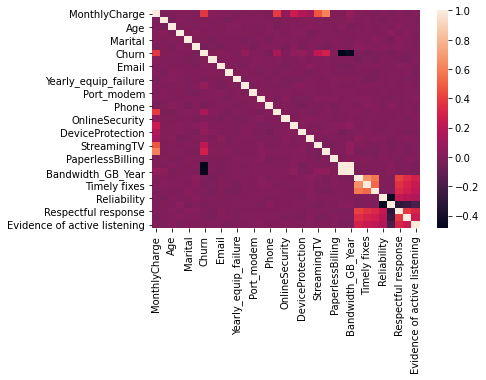

In [46]:
#Initial model heatmap
sns.heatmap(Churn_heatmap.corr(), annot=False)
plt.show
Churn_heatmap.corr()

In [51]:
#Narrowing the initial model, removing multiple variables

Churn_heatmap = df[['MonthlyCharge','Timely response',
'Respectful response', 'Tablet','Yearly_equip_failure',
'Courteous exchange','Evidence of active listening']]

<function matplotlib.pyplot.show(close=None, block=None)>

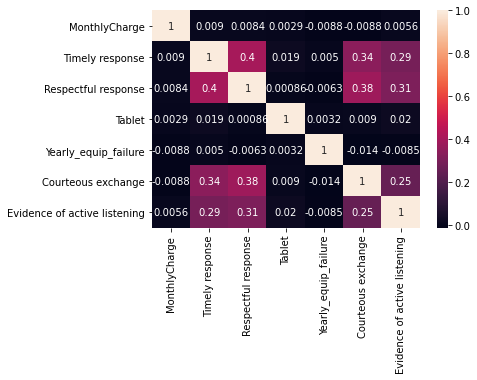

In [52]:
#Reduced Initial model heatmap
sns.heatmap(Churn_heatmap.corr(), annot=True)
plt.show

In [54]:
#Reduced multiple regression model
df['intercept'] = 1
lm_MonthlyCharge_reduced = sm.OLS(df['MonthlyCharge'],df[['Timely response',
'Respectful response', 'Tablet','Yearly_equip_failure',
'Courteous exchange','Evidence of active listening']]).fit()
print(lm_MonthlyCharge_reduced.summary())

                                 OLS Regression Results                                
Dep. Variable:          MonthlyCharge   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.321e+04
Date:                Sun, 11 Sep 2022   Prob (F-statistic):                        0.00
Time:                        14:51:59   Log-Likelihood:                         -45370.
No. Observations:                8361   AIC:                                  9.075e+04
Df Residuals:                    8355   BIC:                                  9.079e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [55]:
#load cleansed data for residual plot
Chur_df = pd.read_csv ('churn_prepared.csv')

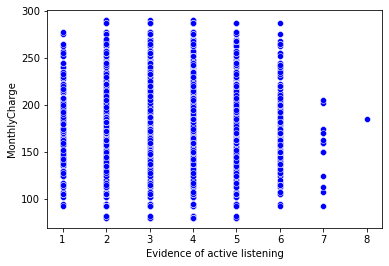

In [56]:
#Create residual plot
Chur_df['intercept'] = 1
residuals = Chur_df['MonthlyCharge']
lm_MonthlyCharge_reduced.predict(Chur_df[['Timely response',
'Respectful response', 'Tablet','Yearly_equip_failure',
'Courteous exchange','Evidence of active listening']])

sns.scatterplot(x=Chur_df['Evidence of active listening'],y=residuals,color='blue')
plt.show();

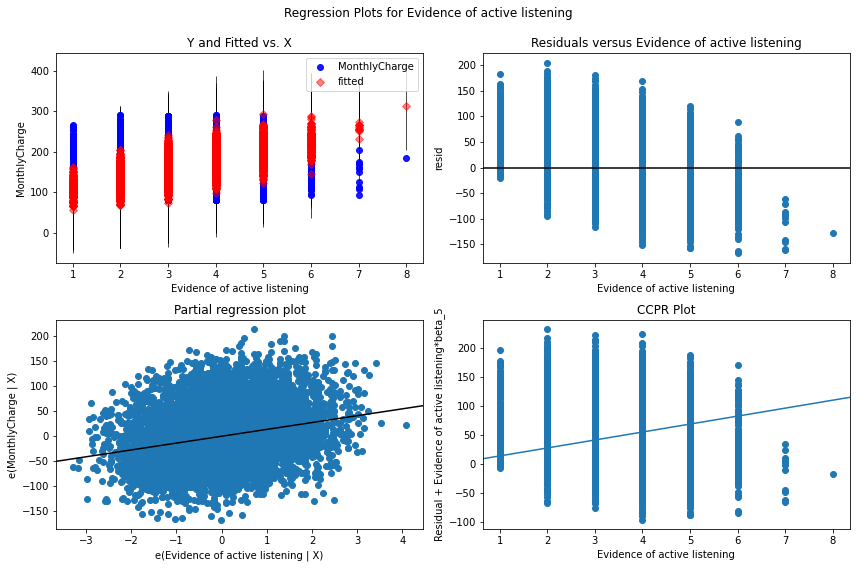

In [57]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#create residual vs. predictor plot for 'Evidence of active listening'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm_MonthlyCharge_reduced, 'Evidence of active listening', fig=fig)

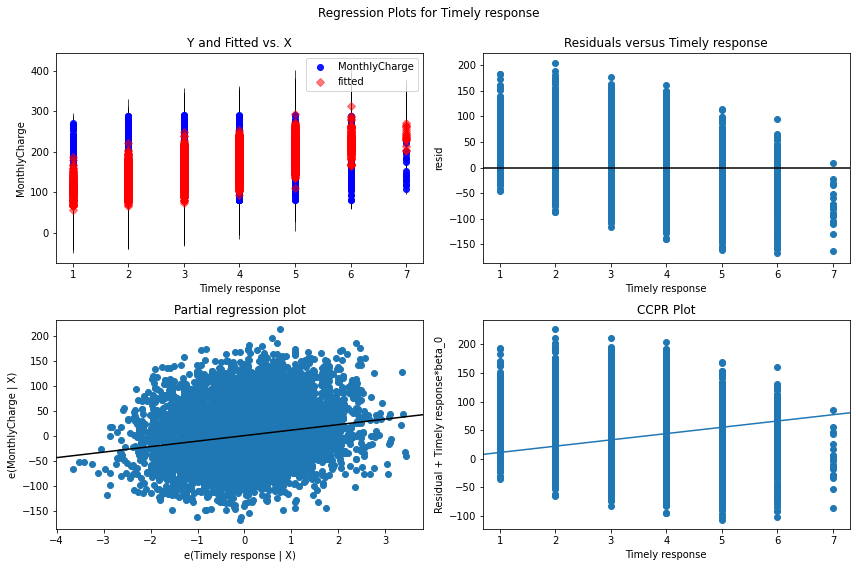

In [58]:
#create residual vs. predictor plot for 'Timely response'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm_MonthlyCharge_reduced, 'Timely response', fig=fig)